In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/ACI.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
0  439 2018-05-08          ACI  375.0  ...  361.8    453      13.478  36,659
1  438 2018-06-08          ACI  373.0  ...  370.6    759      25.894  69,069
2  437 2018-07-08          ACI  373.6  ...  373.8    368      11.013  29,387
3  436 2018-08-08          ACI  369.8  ...  373.0    359       9.561  25,798
4  435 2018-09-08          ACI  365.4  ...  369.1    461      15.324  41,913

[5 rows x 12 columns]

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls "/content/drive/My Drive"

 Aggression_detection
 annotation
 Annotation-data
 assignment
 assignment1.zip
 assignment.ipynb
 assignment_ML
 assignment_shapna.zip
'BANGLA OCR'
 Classroom
 CNN
'Colab Notebooks'
 conference-template-a4.docx
 consent_form_1721568042.docx
'consent form.docx'
'Cooking vlog-shapna '
 deeplearning
'DevOps Engineer.jpg'
 Diabetes_prediction
'dogs-vs-cats '
'ECO Lecture -3.gdoc'
'emu8086.zip (Unzipped Files)'
 finalExam_cse445.docx
 FinalExam_mst.shapna-akter_1721568042.docx
 finalNepal.xls
 finalreport.rtf
 full_traindata.zip
 FUwangfood.ipynb
'Getting started.pdf'
'housing price prediction'
 housingPrice_testDataHandle.ipynb
 implementation_LSTM
 LAB2_1721568042.zip
 LAB4_1721568042.zip
 labeledTrainData.tsv
 mask
'mid -missing part.pdf'
 midterm_1721568042.docx
 midterm_ML
 ML_midterm_1721568042.docx
 ModelFile.zip
'mst shapna akter_1721568042.docx'
 mst_shapna_akter_1721568042.docx
 mst.shapna-akter_1721568042.docx
'mst shapna akter-1721568042-sec09.pdf'
 mst.shapna-akter_1721568042.

In [5]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
36  403 2018-01-10          ACI  344.5  ...  340.0    270       6.432  18,549
59  380 2018-01-11          ACI  350.4  ...  349.6    328      10.607  30,276
37  402 2018-02-10          ACI  347.5  ...  345.3    199       3.682  10,600
79  360 2018-02-12          ACI  322.2  ...  325.2    294       5.220  16,130
16  423 2018-03-09          ACI  364.0  ...  366.5    437      13.092  35,969

[5 rows x 12 columns]

In [ ]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE   LTP*   HIGH  ...    YCP  TRADE  VALUE (mn)  VOLUME
DATE                                        ...                                  
2018-01-10  403          ACI  344.5  352.8  ...  340.0    270       6.432  18,549
2018-01-11  380          ACI  350.4  351.6  ...  349.6    328      10.607  30,276
2018-02-10  402          ACI  347.5  349.0  ...  345.3    199       3.682  10,600

[3 rows x 11 columns]

In [6]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [7]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [8]:
df['volatility'] = df['volatility']*100

In [9]:
import matplotlib.pyplot as plt 

In [10]:
df=df.reset_index()['volatility']

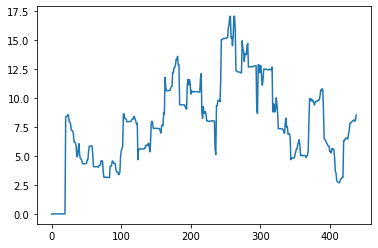

In [11]:
plt.plot(df)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df.shape

(439, 1)

In [13]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
ytest.shape

(31,)

In [ ]:

print(X_test.shape)

(31, 100)


In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_test.shape

(31, 100, 1)

In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [17]:
filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsAci/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsAci/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsAci/model3.h5"

In [18]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 92ms/step - loss: 0.1955 - val_loss: 0.1356
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0342 - val_loss: 0.0218
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0316 - val_loss: 0.0703
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0223 - val_loss: 0.0424
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0166 - val_loss: 0.0411
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0142 - val_loss: 0.0498
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0140 - val_loss: 0.0357
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0111 - val_loss: 0.0432
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0120 - val_loss: 0.0385
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0096 - val_loss: 0.0345
Epoch 11/100
7/7 [=

In [19]:
model1.save(filepath1)

In [20]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 302ms/step - loss: 0.2820 - val_loss: 0.1060
Epoch 2/100
7/7 [==============================] - 1s 126ms/step - loss: 0.0573 - val_loss: 0.0235
Epoch 3/100
7/7 [==============================] - 1s 129ms/step - loss: 0.0300 - val_loss: 0.0240
Epoch 4/100
7/7 [==============================] - 1s 127ms/step - loss: 0.0175 - val_loss: 0.0519
Epoch 5/100
7/7 [==============================] - 1s 127ms/step - loss: 0.0216 - val_loss: 0.0289
Epoch 6/100
7/7 [==============================] - 1s 129ms/step - loss: 0.0174 - val_loss: 0.0306
Epoch 7/100
7/7 [==============================] - 1s 129ms/step - loss: 0.0147 - val_loss: 0.0342
Epoch 8/100
7/7 [==============================] - 1s 131ms/step - loss: 0.0155 - val_loss: 0.0281
Epoch 9/100
7/7 [==============================] - 1s 127ms/step - loss: 0.0142 - val_loss: 0.0296
Epoch 10/100
7/7 [==============================] - 1s 129ms/step - loss: 0.0147 - val_loss: 0.0276
Epoch 11/

In [21]:
model2.save(filepath2)

In [22]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 14s 546ms/step - loss: 0.1438 - val_loss: 0.0559
Epoch 2/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0195 - val_loss: 0.0241
Epoch 3/100
7/7 [==============================] - 2s 216ms/step - loss: 0.0192 - val_loss: 0.0678
Epoch 4/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0154 - val_loss: 0.0267
Epoch 5/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0143 - val_loss: 0.0443
Epoch 6/100
7/7 [==============================] - 2s 216ms/step - loss: 0.0115 - val_loss: 0.0372
Epoch 7/100
7/7 [==============================] - 1s 211ms/step - loss: 0.0108 - val_loss: 0.0307
Epoch 8/100
7/7 [==============================] - 2s 220ms/step - loss: 0.0105 - val_loss: 0.0297
Epoch 9/100
7/7 [==============================] - 2s 221ms/step - loss: 0.0108 - val_loss: 0.0259
Epoch 10/100
7/7 [==============================] - 2s 216ms/step - loss: 0.0093 - val_loss: 0.0241
Epoch 11

In [23]:
model3.save(filepath3)

In [24]:
from keras.models import load_model

In [25]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsAci/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [26]:
print(len(all_models))

3


In [27]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsAci/model1.h5'
model = load_model(f1)


In [28]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [29]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [30]:
#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

5.550860113562379

In [31]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [32]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [33]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [34]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [35]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [36]:
#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

In [37]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [38]:
stacked_model = define_stacked_model(all_models)

In [39]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [40]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [41]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [42]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.3602405 , 0.36961436, 0.3620353 ],
       [0.3558837 , 0.37165302, 0.35135493],
       [0.33975887, 0.35252658, 0.3252655 ],
       [0.32209426, 0.32567716, 0.29941213],
       [0.30487022, 0.31296438, 0.266281  ],
       [0.289663  , 0.3014474 , 0.23717919],
       [0.27750486, 0.29304168, 0.21361858],
       [0.26947483, 0.29248422, 0.19533256],
       [0.26283264, 0.2853835 , 0.1844475 ],
       [0.26008272, 0.28344014, 0.17971241],
       [0.2584323 , 0.274616  , 0.1817984 ],
       [0.25794333, 0.26450986, 0.18746425],
       [0.2611058 , 0.27659887, 0.18871023],
       [0.26137838, 0.27220502, 0.19299442],
       [0.2835478 , 0.28438032, 0.23766264],
       [0.3069191 , 0.2976328 , 0.28696612],
       [0.32932433, 0.31490308, 0.3325075 ],
       [0.34486935, 0.3144702 , 0.372183  ],
       [0.35574257, 0.32038268, 0.39621142],
       [0.3601265 , 0.32165053, 0.40670583],
       [0.361413  , 0.3302669 , 0.4047157 ],
       [0.36320078, 0.3367275 , 0.4047673 ],
       [0.

In [43]:
  yhat=scaler.inverse_transform(yhat)

In [44]:
x, y, z = yhat.T

In [47]:
x

array([6.148436 , 6.074076 , 5.7988644, 5.497372 , 5.203399 , 4.9438486,
       4.7363386, 4.5992856, 4.4859195, 4.438985 , 4.410816 , 4.4024706,
       4.456446 , 4.4610987, 4.839477 , 5.238369 , 5.620772 , 5.886088 ,
       6.0716677, 6.1464906, 6.1684484, 6.1989613, 6.2868013, 6.418107 ,
       6.565185 , 6.6254206, 6.664332 , 6.724493 , 6.773392 , 6.8117723,
       6.8063307], dtype=float32)

In [48]:
avg = (x+y+z)/3

In [49]:
avg.shape

(31,)

In [50]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [51]:
avg

array([[6.211977 , 6.1380258, 5.7890472, 5.3887124, 5.029907 , 4.7123017,
        4.461269 , 4.3083806, 4.1682673, 4.1146274, 4.066903 , 4.03886  ,
        4.132717 , 4.1336436, 4.5831637, 5.072021 , 5.5568366, 5.868534 ,
        6.1007333, 6.1925926, 6.2376094, 6.2848296, 6.4331117, 6.6082554,
        6.825844 , 6.8875175, 6.923916 , 7.0123086, 7.08989  , 7.1483293,
        7.132755 ]], dtype=float32)

In [52]:
Y_test

array([[4.8415822 , 3.64903095, 3.54389713, 2.90619719, 2.77801506,
        2.70505406, 2.7029941 , 2.70046665, 2.88658429, 3.00819794,
        3.07924753, 3.15192822, 3.14391121, 6.32575965, 6.32147298,
        6.44883925, 6.54867157, 6.5523816 , 6.49261228, 6.46785892,
        6.9083622 , 7.14619919, 7.82042649, 7.82491791, 7.91390179,
        7.97094707, 8.04322845, 8.06294477, 8.12044363, 8.01211293,
        8.05218934]])

In [53]:
Y_test.shape

(1, 31)

In [54]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

1.4258954665952466

In [55]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

1.5483265802265596

In [56]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

1.71256725687089

In [57]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

1.1880712564628244

In [58]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,z)
print('MAE: %f' % mae)


MAE: 0.880507
